# Final Project Submission

Please fill out:
* Student name: Thiago Bassi
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [16]:
# Your code here - remember to use markdown cells for comments as well!

# Importing Libraries

In [545]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib
import sqlite3
import matplotlib.pyplot as plt
import json
import pickle
import seaborn as sns
from copy import deepcopy

# Importing the data from the csv's and tsv's

In [546]:
# Reading the csv and the tvs, there was ont that was need to put one enconding
bom_movie_gross = pd.read_csv('data/bom.movie_gross.csv')
rt_movie_info = pd.read_csv('data/rt.movie_info.tsv', delimiter = '\t')
rt_reviews = pd.read_csv('data/rt.reviews.tsv', delimiter = '\t', encoding='ISO-8859-1')
tmdb_movies = pd.read_csv('data/tmdb.movies.csv')
tn_movie_budgets = pd.read_csv('data/tn.movie_budgets.csv')

# SQL queries of IMDB database

In [547]:
con = sqlite3.connect('data/im.db')
cursor_obj = con.cursor()

In [548]:
#creating the queries movies
qr_movie_basics = 'SELECT A.movie_id, B.title, B.region, B.language, B.types, B.attributes, B.is_original_title, A.primary_title, A.original_title, A.start_year, A.runtime_minutes, A.genres FROM movie_basics A , movie_akas B WHERE A.movie_id=B.movie_id'
qr_movie_akas = 'SELECT B.movie_id, B.title, B.region, B.language, B.types, B.attributes, B.is_original_title, A.primary_title, A.original_title, A.start_year, A.runtime_minutes, A.genres, C.averagerating, C.numvotes FROM movie_akas B, movie_basics A, movie_ratings C WHERE B.movie_id=A.movie_id and B.movie_id=C.movie_id' #
qr_movie_ratings = 'SELECT C.movie_id, C.averagerating, C.numvotes FROM movie_ratings C, movie_basics A WHERE C.movie_id=A.movie_id' #

In [550]:
#creating the queries person
qr_persons = 'SELECT * FROM persons' # DONE
qr_directors = 'SELECT A.movie_id, A.person_id, B.primary_name, B.birth_year, B.death_year, B.primary_profession, D.title, D.region, D.language, D.types, D.attributes, D.is_original_title, E.primary_title, E.original_title, E.start_year, E.runtime_minutes, E.genres, C.averagerating, C.numvotes FROM directors A, persons B, movie_ratings C, movie_akas D, movie_basics E WHERE A.person_id=B.person_id AND A.movie_id=D.movie_id AND C.movie_id=D.movie_id AND E.movie_id=D.movie_id' #
qr_writers = 'SELECT A.movie_id, A.person_id, B.primary_name, B.birth_year, B.death_year, B.primary_profession, D.title, D.region, D.language, D.types, D.attributes, D.is_original_title, E.primary_title, E.original_title, E.start_year, E.runtime_minutes, E.genres, C.averagerating, C.numvotes FROM writers A, persons B, movie_ratings C, movie_akas D, movie_basics E WHERE A.person_id=B.person_id  AND A.movie_id=D.movie_id AND C.movie_id=D.movie_id AND E.movie_id=D.movie_id'
qr_known_for = 'SELECT A.movie_id, A.person_id, B.primary_name, B.birth_year, B.death_year, B.primary_profession, D.title, D.region, D.language, D.types, D.attributes, D.is_original_title, E.primary_title, E.original_title, E.start_year, E.runtime_minutes, E.genres, C.averagerating, C.numvotes FROM known_for A, persons B, movie_ratings C, movie_akas D, movie_basics E WHERE A.person_id=B.person_id  AND A.movie_id=D.movie_id AND C.movie_id=D.movie_id AND E.movie_id=D.movie_id' #DONE
qr_principals = 'SELECT A.movie_id, A.person_id, A.category, A.job, A.characters, B.primary_name, B.birth_year, B.death_year, B.primary_profession, D.title, D.region, D.language, D.types, D.attributes, D.is_original_title, E.primary_title, E.original_title, E.start_year, E.runtime_minutes, E.genres, C.averagerating, C.numvotes FROM principals A, persons B, movie_ratings C, movie_akas D, movie_basics E WHERE A.person_id=B.person_id  AND A.movie_id=D.movie_id AND C.movie_id=D.movie_id AND E.movie_id=D.movie_id' #DONE

In [549]:
#upload the tables with data movies
tb_movie_basics = pd.read_sql(qr_movie_basics,con)
tb_movie_akas = pd.read_sql(qr_movie_akas,con)
tb_movie_ratings = pd.read_sql(qr_movie_ratings,con)

In [551]:
#upload the tables with data person
tb_persons = pd.read_sql(qr_persons,con)
tb_directors = pd.read_sql(qr_directors,con)
tb_writers = pd.read_sql(qr_writers,con)
tb_principals = pd.read_sql(qr_principals,con)
tb_known_for = pd.read_sql(qr_known_for,con)

# Organizing the data on the tables

### From the db's tables

In [8]:
#spliting genres at persons table
tb_writers['genres_split'] = tb_writers['genres'].str.split(",")
tb_directors['genres_split'] = tb_directors['genres'].str.split(",")
tb_principals['genres_split'] = tb_principals['genres'].str.split(",")
tb_known_for['genres_split'] = tb_known_for['genres'].str.split(",")

In [552]:
#spliting primary pofession at persons table
tb_writers['primary_profession_split'] = tb_writers['primary_profession'].str.split(",")
tb_directors['primary_profession_split'] = tb_directors['primary_profession'].str.split(",")
tb_principals['primary_profession_split'] = tb_principals['primary_profession'].str.split(",")
tb_known_for['primary_profession_split'] = tb_known_for['primary_profession'].str.split(",")

In [553]:
#spliting genres at movies table
tb_movie_akas['genres_split'] = tb_movie_akas['genres'].str.split(",")
tb_movie_basics['genres_split'] = tb_movie_basics['genres'].str.split(",")

In [554]:
# separating only the movies that are the principal name in people
tb_writers_tot = deepcopy(tb_writers[tb_writers['is_original_title'] == 1])
tb_directors_tot = deepcopy(tb_directors[tb_directors['is_original_title'] == 1])
tb_principals_tot = deepcopy(tb_principals[tb_principals['is_original_title'] == 1])
tb_known_for_tot = deepcopy(tb_known_for[tb_known_for['is_original_title'] == 1])

In [555]:
# separating only the movies that are the principal name in movies
tb_movie_akas_tot = deepcopy(tb_movie_akas[tb_movie_akas['is_original_title'] == 1])
tb_movie_basics_tot = deepcopy(tb_movie_basics[tb_movie_basics['is_original_title'] == 1])

In [556]:
## Removing movies before 2010
#convert to datetime
tb_movie_basics_tot['year'] = tb_movie_basics_tot['start_year'].astype(int)
tb_movie_akas_tot['year'] = pd.to_datetime(tb_movie_akas_tot['start_year']).astype(int)
tb_known_for_tot['year'] = pd.to_datetime(tb_known_for_tot['start_year']).astype(int)
tb_principals_tot['year'] = pd.to_datetime(tb_principals_tot['start_year']).astype(int)
tb_directors_tot['year'] = pd.to_datetime(tb_directors_tot['start_year']).astype(int)
tb_writers_tot['year'] = pd.to_datetime(tb_writers_tot['start_year']).astype(int)

### From the cvs's and tsv's files

In [557]:
#Step 1
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].map(lambda x: x.strip('$'))
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].map(lambda x: x.strip('$'))
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].map(lambda x: x.strip('$'))

In [558]:
#STEP 2
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].map(lambda x: float(x.replace(",", "")))
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].map(lambda x: float(x.replace(",", "")))
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].map(lambda x: float(x.replace(",", "")))

In [559]:
##New Columns for Profit information
#domestic_profiit
tn_movie_budgets['domestic_profit'] = tn_movie_budgets['domestic_gross'] - tn_movie_budgets['production_budget']

In [560]:
#total_profit
tn_movie_budgets['total_profit'] = tn_movie_budgets['worldwide_gross'] - tn_movie_budgets['production_budget']

In [561]:
#roi
tn_movie_budgets['roi'] = (tn_movie_budgets['worldwide_gross']-tn_movie_budgets['production_budget'])/tn_movie_budgets['production_budget']

In [562]:
## Removing movies before 2010
#convert to datetime
tn_movie_budgets['release_date'] = pd.to_datetime(tn_movie_budgets['release_date'])
#set index to datetime
tn_movie_budgets.set_index('release_date', inplace=True)

In [563]:
#slice out our timeframe
recent_movie_budgets = deepcopy(tn_movie_budgets.sort_index().loc['01-01-2010':'12-31-2022'])
recent_movie_budgets.reset_index(inplace = True)

In [564]:
#creating the year to use as indice for the merge
recent_movie_budgets['year'] = recent_movie_budgets['release_date'].dt.year

In [742]:
#reseting the index for better merge it
tb_movie_basics_tot.reset_index(inplace = True)

In [566]:
#Creating the categories base n the percentiles
production_budget_per = np.percentile(recent_movie_budgets['production_budget'],[0,25,50,75,100])
domestic_gross_per = np.percentile(recent_movie_budgets['domestic_gross'],[0,25,50,75,100])
worldwide_gross_per = np.percentile(recent_movie_budgets['worldwide_gross'],[0,25,50,75,100])
domestic_profit_per = np.percentile(recent_movie_budgets['domestic_profit'],[0,25,50,75,100])
total_profit_per = np.percentile(recent_movie_budgets['total_profit'],[0,25,50,75,100])
roi_per = np.percentile(recent_movie_budgets['roi'],[0,25,50,75,100])

In [567]:
#Creating the categories base n the percentiles with 4 categories
recent_movie_budgets['production_budget_cat'] = pd.qcut(recent_movie_budgets['production_budget'], 4, labels = ['cat1', 'cat2', 'cat3', 'cat4'])
recent_movie_budgets['domestic_gross_cat'] = pd.qcut(recent_movie_budgets['domestic_gross'], 4, labels = ['cat1', 'cat2', 'cat3', 'cat4'])
recent_movie_budgets['worldwide_gross_cat'] = pd.qcut(recent_movie_budgets['worldwide_gross'], 4, labels = ['cat1', 'cat2', 'cat3', 'cat4'])
recent_movie_budgets['domestic_profit_cat'] = pd.qcut(recent_movie_budgets['domestic_profit'], 4, labels = ['cat1', 'cat2', 'cat3', 'cat4'])
recent_movie_budgets['total_profit_cat'] = pd.qcut(recent_movie_budgets['total_profit'], 4, labels = ['cat1', 'cat2', 'cat3', 'cat4'])
recent_movie_budgets['roi_cat'] = pd.qcut(recent_movie_budgets['roi'], 4, labels = ['cat1', 'cat2', 'cat3', 'cat4'])

### Merging the tables

In [569]:
#creating the movie base


In [743]:
#creating the base tables for movies merging with the budget tables
movie_base = tb_movie_basics_tot.merge(recent_movie_budgets[recent_movie_budgets['worldwide_gross'] != 0], left_on=['title','year'],right_on=['movie','year'], how = 'inner')
directors_movie = tb_directors_tot.merge(recent_movie_budgets[recent_movie_budgets['worldwide_gross'] != 0],left_on=['title','year'],right_on=['movie','year'], how = 'inner')
known_for_movie = tb_known_for_tot.merge(recent_movie_budgets[recent_movie_budgets['worldwide_gross'] != 0],left_on=['title','year'],right_on=['movie','year'], how = 'inner')
movie_base_aka = tb_movie_akas_tot.merge(recent_movie_budgets[recent_movie_budgets['worldwide_gross'] != 0], left_on=['title','year'],right_on=['movie','year'], how = 'inner')
aka_movie = tb_movie_akas_tot.merge(recent_movie_budgets[recent_movie_budgets['worldwide_gross'] != 0],left_on=['title','year'],right_on=['movie','year'], how = 'inner')
principals_movie = tb_principals_tot.merge(recent_movie_budgets[recent_movie_budgets['worldwide_gross'] != 0],left_on=['title','year'],right_on=['movie','year'], how = 'inner')
writers_movie = tb_writers_tot.merge(recent_movie_budgets[recent_movie_budgets['worldwide_gross'] != 0],left_on=['title','year'],right_on=['movie','year'], how = 'inner')

### Exploding the data by field that we want to analise

In [573]:
# separating the genres and primary at person table
writers_movie_ex = writers_movie.explode('genres_split')
directors_movie_ex = directors_movie.explode('genres_split')
principals_movie_ex = principals_movie.explode('genres_split')
known_for_movie_ex = known_for_movie.explode('genres_split')
writers_movie_ex = writers_movie_ex.explode('primary_profession_split')
directors_movie_ex = directors_movie_ex.explode('primary_profession_split')
principals_movie_ex = principals_movie_ex.explode('primary_profession_split')
known_for_movie_ex = known_for_movie_ex.explode('primary_profession_split')

In [575]:
# separating the genres and primary at movies table
aka_movie_ex = movie_base_aka.explode('genres_split')
movie_base_ex = movie_base.explode('genres_split')

### Analyse of the budget

<ipython-input-773-7856bc7037da>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['$0','$0', '$50M', '$100M', '$150M',


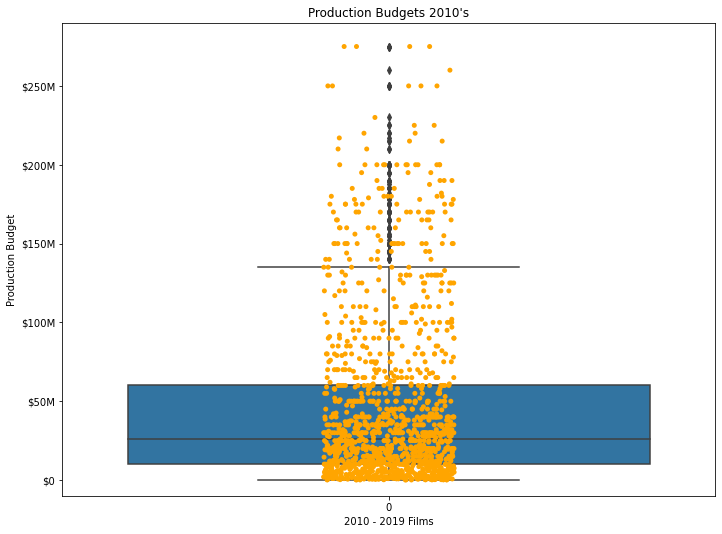

In [773]:
fig, ax = plt.subplots()

fig.set_size_inches(11.7, 8.7)
sns.boxplot(y = 'production_budget', data = aka_movie, ax = ax)
g = sns.stripplot(data=aka_movie['production_budget'], color = 'orange')
g.set(xlabel ="2010 - 2019 Films", ylabel = "Production Budget", title ="Production Budgets 2010's")
ax.set_yticklabels(['$0','$0', '$50M', '$100M', '$150M',
                   '$200M', '$250M'])
# ax.xlabel(fontsize=16);
# ax.ylabel(fontsize=16);
# ax.title(fontsize=20)
# change the limits of Y-axis
ax.set_ylim(-10000000, 290000000)
plt.show()

<ipython-input-774-52612f062fdd>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['$0','$0', '$50M', '$100M', '$150M',


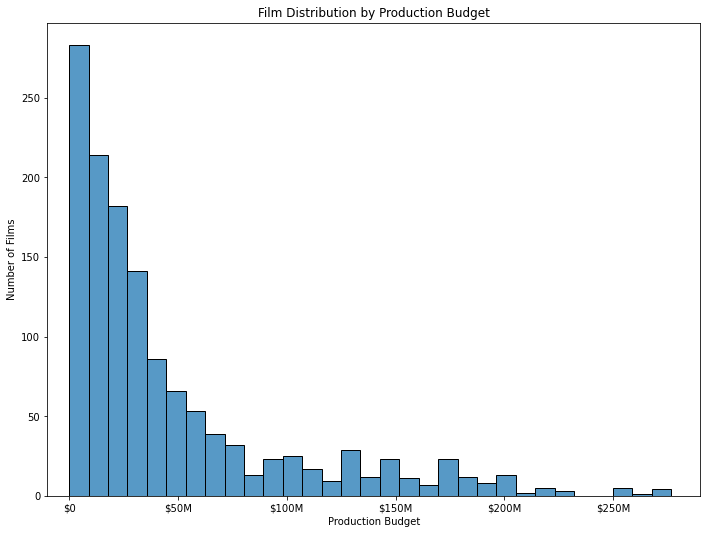

In [774]:
fig, ax = plt.subplots()

fig.set_size_inches(11.7, 8.7)
h = sns.histplot(data = aka_movie['production_budget'], ax = ax)
ax.set_xlim(-10000000, 290000000)
ax.set_xticklabels(['$0','$0', '$50M', '$100M', '$150M',
                   '$200M', '$250M'])


h.set(ylabel ="Number of Films", xlabel = "Production Budget", title ="Film Distribution by Production Budget")
plt.show()

### Tweaking dataset to extract categorical data

In [775]:
## Adding a new column to our main dataset that categorizes movies between percentiles
result = []
for value in aka_movie["production_budget"]:
    if value < 10000000.0:
        result.append("Low Budget")
    elif value > 10000000.0 and value < 26000000.0:
        result.append("Mid Budget")
    elif value > 26000000.0 and value < 60000000.0:
        result.append("Big Budget")
    else:
        result.append("Whopper")
aka_movie["budget_category"] = result

In [776]:
## Making Lists of the Top Performing Movies by budget category (using aka_movie, not the exploded aka_movie_ex)
whopper_movies = list(aka_movie[aka_movie.budget_category=='Whopper'].sort_values(by = 'roi', ascending=False).head(10)['title'].values)
big_movies = list(aka_movie[aka_movie.budget_category=='Big Budget'].sort_values(by = 'roi', ascending=False).head(10)['title'].values)
mid_movies = list(aka_movie[aka_movie.budget_category=='Mid Budget'].sort_values(by = 'roi', ascending=False).head(10)['title'].values)
low_movies = list(aka_movie[aka_movie.budget_category=='Low Budget'].sort_values(by = 'roi', ascending=False).head(10)['title'].values)

In [778]:
## Making value counts on top performing movie genres (using exploded aka_movie_ex to capture multiple genre movies)
whopper_movie_genres = aka_movie_ex[aka_movie_ex['title'].isin(whopper_movies)]['genres_split'].value_counts()
big_movie_genres = aka_movie_ex[aka_movie_ex['title'].isin(big_movies)]['genres_split'].value_counts()
mid_movie_genres= aka_movie_ex[aka_movie_ex['title'].isin(mid_movies)]['genres_split'].value_counts()
low_movie_genres = aka_movie_ex[aka_movie_ex['title'].isin(low_movies)]['genres_split'].value_counts()

In [790]:
print('The Whopper Movies are:','\n', whopper_movies,'\n')
print('The Big Movies are:','\n',big_movies,'\n')
print('The Mid Movies are:','\n',mid_movies,'\n')
print('The Low Movies are:','\n',low_movies,'\n')

The Whopper Movies are: 
 ['Halloween', 'Insidious: The Last Key', 'Minions', 'Despicable Me 3', 'Despicable Me 2', 'The Purge: Election Year', 'The Secret Life of Pets', 'Jumanji: Welcome to the Jungle', 'The Twilight Saga: Eclipse', 'Jigsaw'] 

The Big Movies are: 
 ['It', 'Bohemian Rhapsody', 'Fifty Shades of Grey', 'Deadpool', 'Lucy', 'Ted', 'The Maze Runner', 'Pitch Perfect 2', 'American Sniper', 'Bridesmaids'] 

The Mid Movies are: 
 ['The Fault in Our Stars', 'Black Swan', 'La La Land', 'Annabelle: Creation', 'A Quiet Place', 'The Conjuring', 'Wonder', 'The Imitation Game', 'Neighbors', 'Green Book'] 

The Low Movies are: 
 ['The Gallows', 'The Devil Inside', 'Paranormal Activity 2', 'Get Out', 'Moonlight', 'Chernobyl Diaries', 'Paranormal Activity 3', 'Annabelle', 'The Last Exorcism', 'Dangal'] 



In [791]:
df1 = pd.DataFrame(whopper_movie_genres)

### Analyse of the engagements

In [726]:
# creating the base table for the categorized grafcs for analise the engagements
tb_genres_rates = aka_movie_ex[aka_movie_ex['is_original_title']==1][['genres_split','averagerating','numvotes','movie_id','title']]

In [769]:
# separating the tops and the bottoms in the mean for the amount of people that voted and removing the genre with very few data
num_head = list(tb_genres_rates.groupby(['genres_split'])['numvotes'].mean().sort_values(ascending = False).head(4).index)
num_tail = list(tb_genres_rates.groupby(['genres_split'])['numvotes'].mean().sort_values(ascending = False).tail(3).index)
order_gen_num = num_head + num_tail
order_gen_num.pop(1)


'Western'

In [764]:
order_gen_num

['Sci-Fi', 'Adventure', 'Action', 'Horror', 'Music', 'Documentary']

In [745]:
#analising the mean for the reating by genres
ave_head = list(tb_genres_rates.groupby(['genres_split'])['averagerating'].mean().sort_values(ascending = False).head(3).index)
ave_tail = list(tb_genres_rates.groupby(['genres_split'])['averagerating'].mean().sort_values(ascending = False).tail(3).index)
order_gen_ave = ave_head + ave_tail

['Biography', 'Sport', 'History', 'Thriller', 'Fantasy', 'Horror']

In [ ]:
#movie_top_bot['genres_split'].astype('O')
#movie_top_bot['genres_split'].astype('category')
#movies = aka_movie_ex[['movie_id','title','start_year','averagerating','numvotes','genres_split','production_budget','domestic_gross','worldwide_gross','domestic_profit','total_profit','roi','production_budget_cat','domestic_gross_cat','worldwide_gross_cat','domestic_profit_cat','total_profit_cat','roi_cat']]


In [729]:
#creating the subset with the top and bottom movies with the most data.
movies = aka_movie_ex[['movie_id','title','start_year','averagerating','numvotes','genres_split','production_budget','total_profit','production_budget_cat','total_profit_cat']]
movie_top_bot = movies[movies['genres_split'].isin(order_gen_num)]

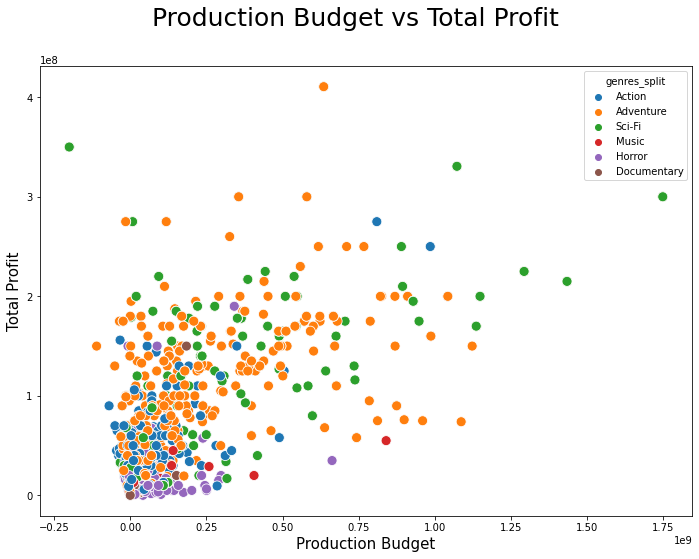

In [765]:
#ploting the grafic where shows the total profit versus the cost to produce the movies per category
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.scatterplot(x = 'total_profit', y = 'production_budget', 
                s = 100, hue = 'genres_split', data = movie_top_bot)
ax.set_xlabel('Production Budget', fontsize = 15)
ax.set_ylabel('Total Profit', fontsize = 15)
fig.suptitle('Production Budget vs Total Profit', fontsize = 25, verticalalignment = 'top')
plt.show()

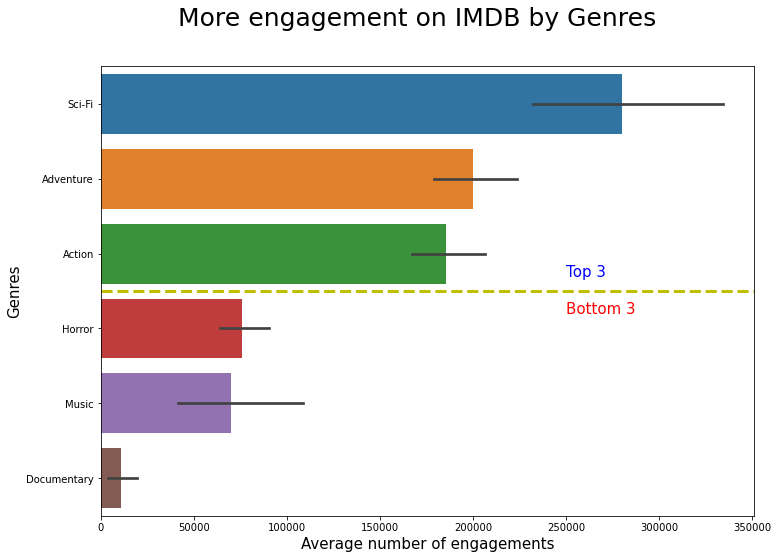

In [770]:
#pltong the grafic that check the top genres 3 and bottom 3 genres in engagment
order = order_gen_num
x = 'numvotes'
y = 'genres_split'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
fig.suptitle('More engagement on IMDB by Genres', fontsize = 25, verticalalignment = 'top')

sns.barplot(y = y , x = x, data = tb_genres_rates,order = order, ax=ax)
ax.set_xlabel('Average number of engagements', fontsize = 15)
ax.set_ylabel('Genres', fontsize = 15)
ax.annotate('Top 3', xy = [250000,2.3], fontsize = 15, c = 'b')
ax.annotate('Bottom 3', xy = [250000,2.8], fontsize = 15, c = 'r')
ax.annotate
ax.axhline(y =2.5, c ='y', linewidth = 3, linestyle = '--')



plt.show()

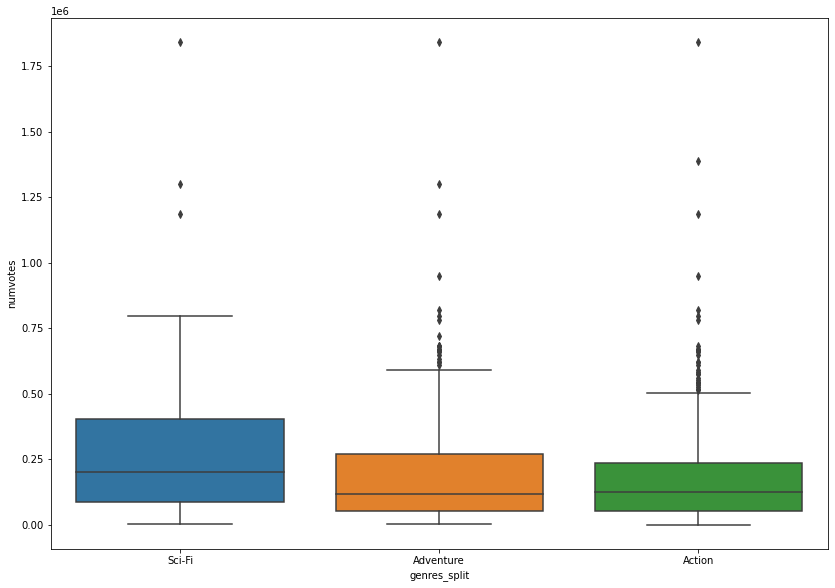

In [772]:
# boxplot top 3 genres
order_here = deepcopy(order_gen_num)
order_here.pop(3)
order_here.pop(3)
order_here.pop(3)
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.boxplot(x = 'genres_split', y = 'numvotes', data = movie_top_bot, orient = 'v', order = order_here)
plt.tight_layout()

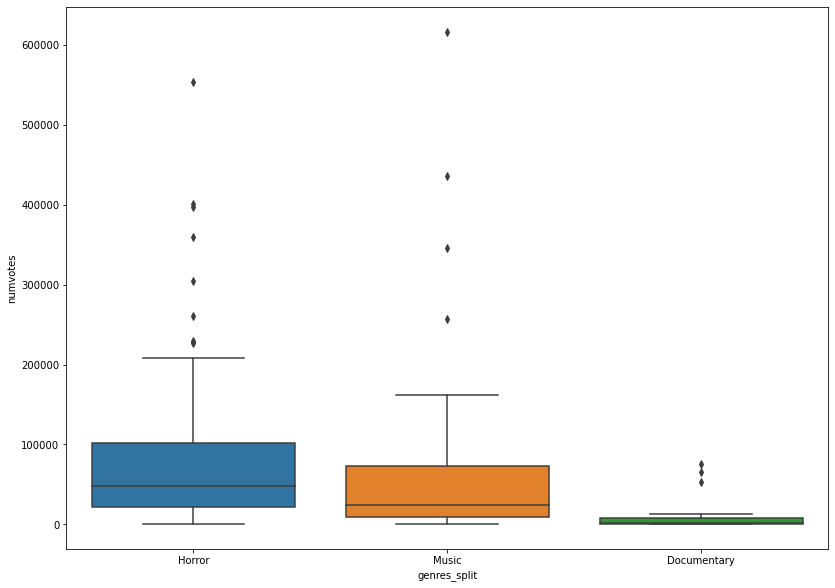

In [771]:
# boxplot bottom 3 genres
order_here = deepcopy(order_gen_num)
order_here.pop(0)
order_here.pop(0)
order_here.pop(0)
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.boxplot(x = 'genres_split', y = 'numvotes', data = movie_top_bot, orient = 'v', order = order_here)
plt.tight_layout()

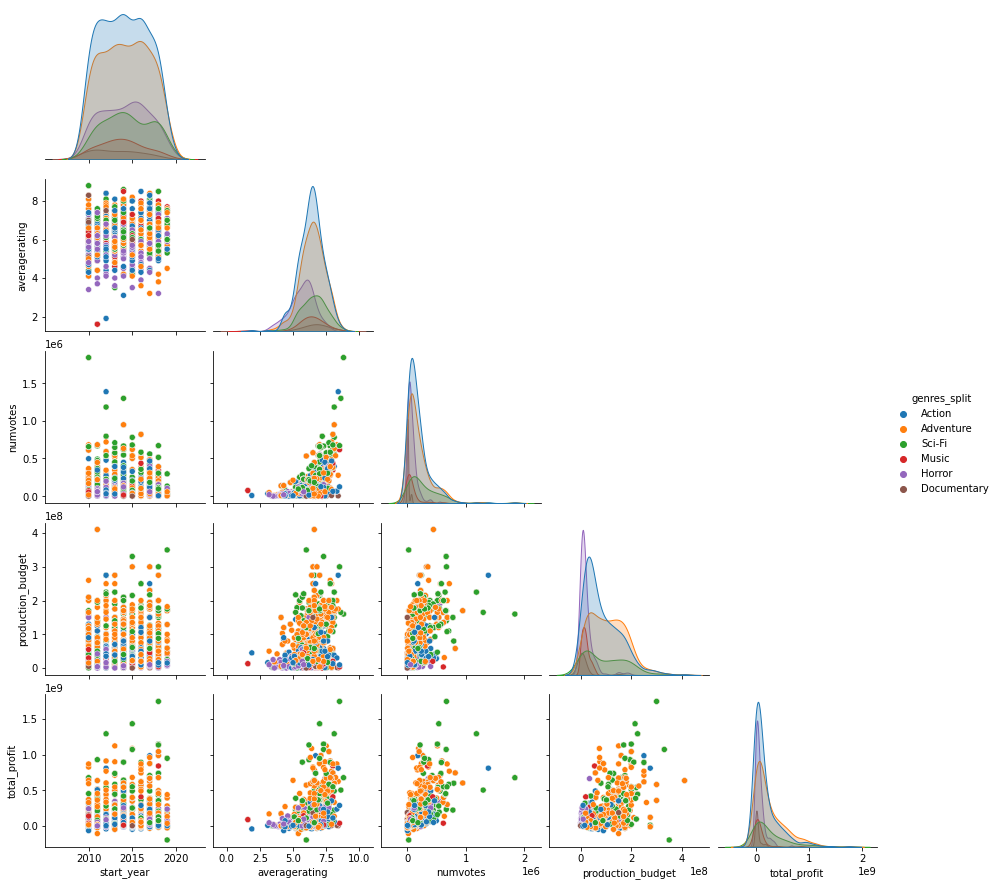

In [732]:
# analising the data to check any good point on it
sns.pairplot(movie_top_bot, corner = True, hue = 'genres_split')
plt.show()

In [733]:
%%capture histhistpair
sns.pairplot(movie_top_bot, hue = 'genres_split', diag_kind= "hist", kind = "hist", 
             diag_kws = {'element': 'step'}, plot_kws = {'bins': 15}, corner = True)
plt.show()

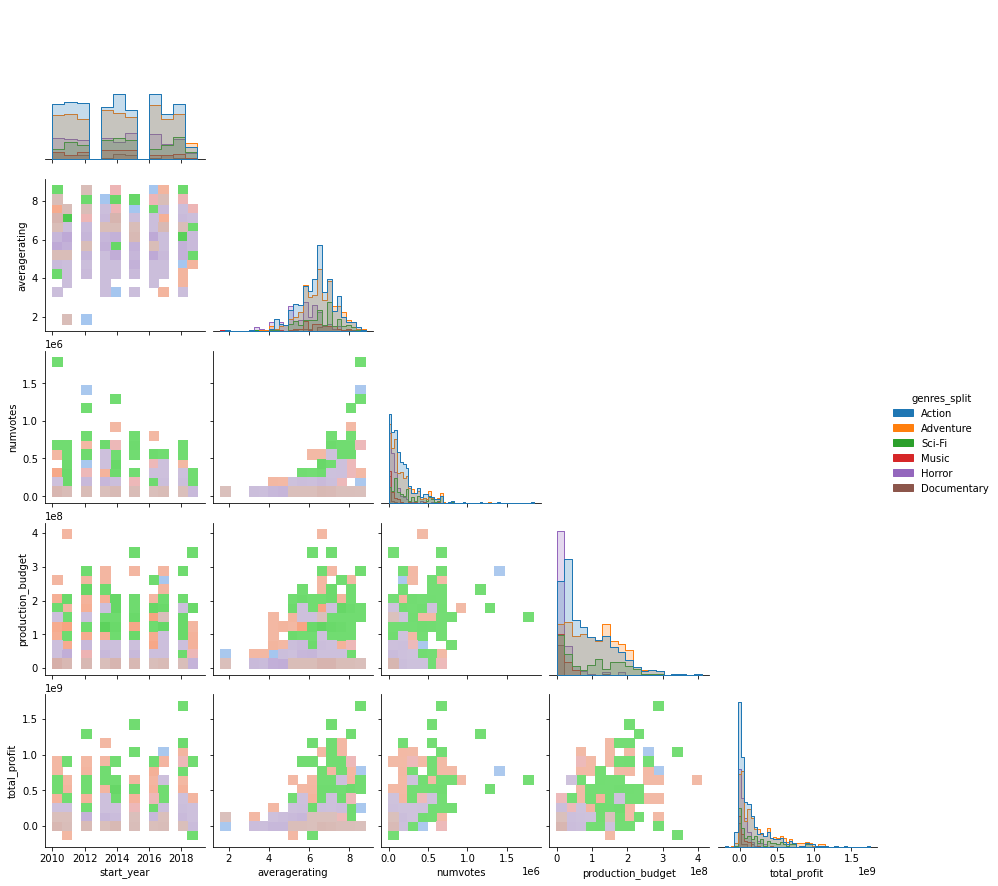

In [734]:
histhistpair()